## Day 49 Lecture 2 Assignment

In this assignment, we will apply mean shift clustering to a dataset containing the results of a survey on financial wellbeing.

In [21]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [22]:
# answer goes here
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv'

financial_df = pd.read_csv(url)

financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


While the survey questions have the potential for interesting cluster analysis, we will stick to the "score" columns to avoid clustering in an unreasonably high-dimensional space. The columns we are interested in all have "score" in their names; identify and isolate these columns. (There should be 4 in total.)

In [23]:
# answer goes here
score_df = financial_df.filter(like='score', axis=1)

score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FWBscore  6394 non-null   int64  
 1   FSscore   6394 non-null   int64  
 2   LMscore   6394 non-null   int64  
 3   KHscore   6394 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 199.9 KB


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [24]:
# answer goes here
scaler = StandardScaler()

score_df_std = pd.DataFrame(scaler.fit_transform(score_df), index=score_df.index)

score_df_std

pca = PCA(n_components=2)

score_pca = pca.fit_transform(score_df_std)

Run mean shift clustering on the scores in the survey dataset using the default bandwidth. Then answer the following by printing or typing as appropriate:

- How many clusters are produced? 
- What are the cluster centers?
- How many responses are assigned to each cluster?
- Are these results reasonable? If not, what changes should we make?

In [25]:
# answer goes here
ms = MeanShift(bin_seeding=True)

ms.fit(score_df_std)

MeanShift(bandwidth=None, bin_seeding=True, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [26]:
ms.cluster_centers_

array([[ 0.09910974, -0.0476231 ,  0.40823556,  0.33667065],
       [-4.02966165, -4.08655136, -2.98779955, -2.17097301]])

In [27]:
clusters = pd.Series(ms.labels_, index=score_df.index, name='clusters')
clusters

0       0
1       0
2       0
3       0
4       0
       ..
6389    0
6390    0
6391    0
6392    0
6393    0
Name: clusters, Length: 6394, dtype: int64

In [28]:
score_df = pd.concat([score_df, clusters],1)

In [29]:
score_df['clusters'].value_counts()

0    6326
1      68
Name: clusters, dtype: int64

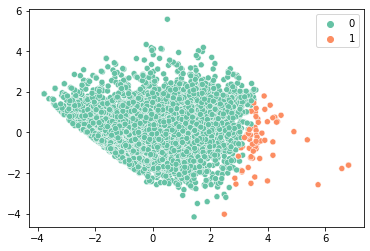

In [30]:
sns.scatterplot(x=score_pca[:,0], y=score_pca[:,1], hue=clusters, palette='Set2')
plt.legend()
plt.show()

Try changing the appropriate parameters of the mean shift algorithm to achieve a better clustering result. Answer all of the same questions from the previous clustering step.

In [54]:
# answer goes here
ms_best = MeanShift(bandwidth=1.65, bin_seeding=False)

%timeit ms_best.fit(score_df_std)

1 loop, best of 3: 1min per loop


In [55]:
np.unique(ms_best.labels_)

array([0, 1, 2, 3, 4])

In [56]:
ms_best.cluster_centers_

array([[ 0.15777713, -0.03387021,  0.50974961,  0.46957491],
       [-0.297997  , -0.3800716 , -0.99866973, -0.81803671],
       [-0.04278236, -3.45443665, -3.12968123, -2.25038953],
       [-4.02966165, -4.08655136, -2.98779955, -2.17097301],
       [ 1.69327648, -3.21739364,  0.65383032,  0.94362696]])

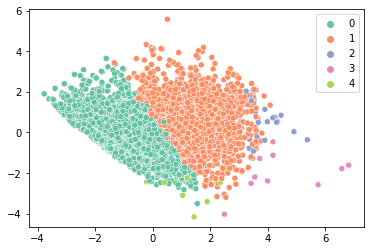

In [57]:
sns.scatterplot(x=score_pca[:,0], y=score_pca[:,1], hue=ms_best.labels_, palette='Set2')
plt.legend()
plt.show()

In [58]:
ms_best.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [59]:
best_clusters = pd.Series(ms_best.labels_, index=score_df.index, name='clusters')
best_clusters

0       0
1       0
2       0
3       1
4       1
       ..
6389    0
6390    1
6391    1
6392    1
6393    1
Name: clusters, Length: 6394, dtype: int64

In [60]:
best_clusters.value_counts()

0    4201
1    2139
2      26
4      17
3      11
Name: clusters, dtype: int64